In [1]:
import os
import numpy as np

from cil.io import NEXUSDataReader
from cil.utilities.display import show2D, show_geometry

from sirf import STIR as pet
from sirf import Reg as reg


In [10]:
dirname = os.path.abspath("/home/jovyan/work/MargareteKattau")

In [11]:
#load original data
# ElementSpacing = 0.66210901737213135 0.66210901737213135 2.5
# DimSize = 246 306 3
# ElementType = MET_SHORT

filename = os.path.abspath(os.path.join(dirname,"CroppedSlices-patient053.raw"))
ref = np.fromfile(filename, dtype=np.int16)
ref = ref.reshape([246, 306, 3][::-1])
ref_spacing = [0.66210901737213135, 0.66210901737213135, 2.5][::-1]


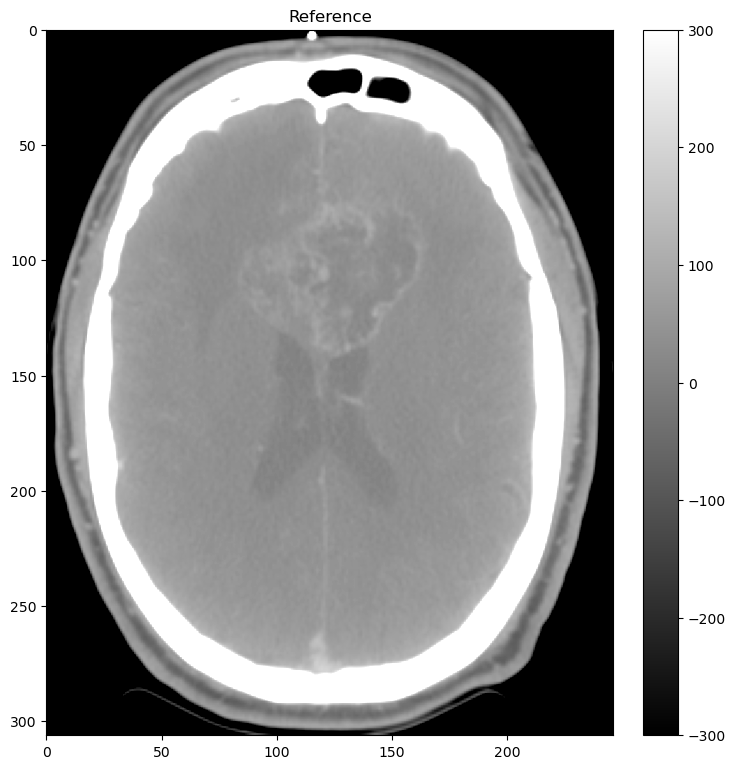

In [12]:
show2D(ref[1], title="Reference", origin="upper", 
       cmap="gray", fix_range=(-300,300))

In [14]:
reader = NEXUSDataReader(os.path.join(dirname, "recon.nxs"))
recon = reader.read()

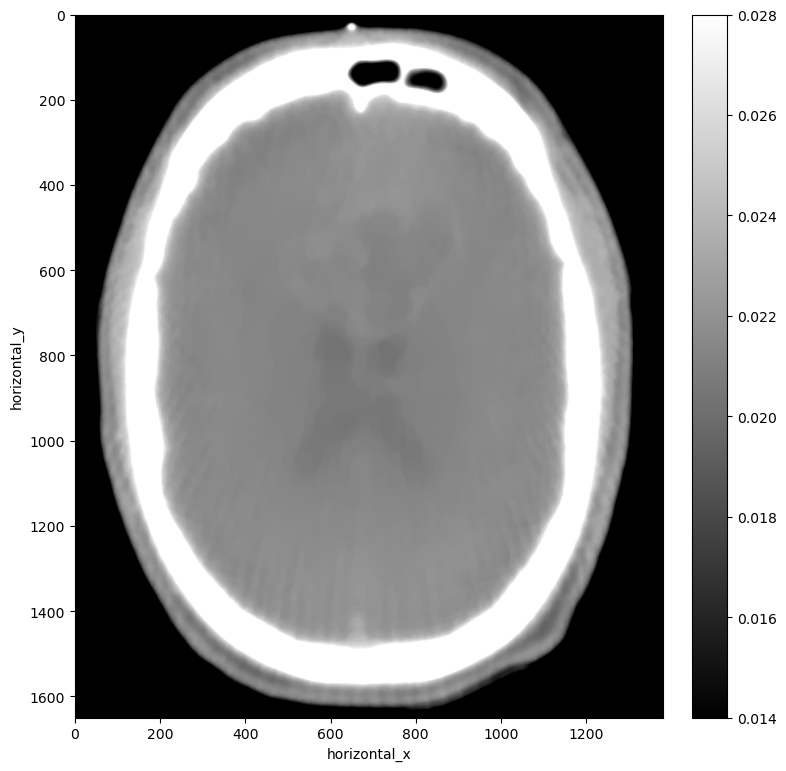

In [23]:
show2D(recon, origin="upper", 
       cmap="gray", fix_range=(0.014,0.028))

In [29]:
from sirf import STIR, Reg
# create a non empty ImageData calling initialise
pdata = STIR.ImageData()
shape = list(ref.shape)
if len(shape) == 2:
    shape.append(1)

pdata.initialise(tuple(shape))

print (recon)

# create the 
img1 = Reg.ImageData(pdata)
img1.fill(recon.as_array())

Number of dimensions: 2
Shape: (1650, 1380)
Axis labels: ('horizontal_y', 'horizontal_x')



In [30]:
# create the 
img2 = Reg.ImageData(pdata)
img2.fill(ref[1])

In [31]:
# Set to NiftyF3dSym for non-rigid
algo = Reg.NiftyAladinSym()

# Set images
algo.set_reference_image(img1)
algo.set_floating_image(img2)

In [32]:
algo.process()

[NiftyReg ERROR] 0 correspondances between blocks were found
[NiftyReg ERROR] Not enough correspondences were found - it is impossible to estimate an affine transfomation


error: ??? "'[NiftyReg] Exception' exception caught at line 656 of /opt/SIRF-SuperBuild/sources/SIRF/src/Registration/cReg/cReg.cpp; the reconstruction engine output may provide more information"